# Aprendizaje de maquinas  -- R -- Métodos Basados en Árboles.
Notas de clase sobre aprendizaje de maquinas usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre regresión logistica usando **R** en el contexto de aprendizaje de maquinas. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido


>* [Introducción](#Introduccion)
* [Definición](#Definicion)
* [Algoritmos de árboles de decisión](#Algoritmos-de-árboles-de-decisión)
* [Árboles de Regresion y Clasificación CART](#Árboles-de-Regresion-y-Clasificación-CART)
    * [Árboles de Regresion CART](#Árboles-de-Regresion-CART)
    * [Árboles de Clasificación CART](#Árboles-de-Clasificación-CART)
    * [Aplicación algoritmo CART ](#Aplicación-algoritmo-CART )
* [Algoritmo C5.0](#Algoritmo-C5.0)
    * [Aplicación algoritmo C5.0 ](#Aplicación-algoritmo-C5.0 )

**Bibliografía**.

>  

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Introduccion
[Contenido](#Contenido)

Los métodos basados en árboles son modelos que utilizan diagramas de que representan reglas lógicas, más conocidos como árboles, que se utilizan para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema a partir de los datos de entrada. 

Estos modelos se enfrentan a los problemas de regresión y clasificación de forma exitosa los cuales se veran más adelante, así como sus propiedades interesantes en cada uno de los métodos (manejo de valores faltantes o su alta interpretabilidad).

# Definicion
[Contenido](#Contenido)

Los árboles de decisión consisten en una serie de puntos de partición o nodos donde cada uno representa una regla de decisión para dividir los datos. El modelo empieza con el nodo principal o raíz el cual reparte, a la derecha o izquierda del árbol, la información de entrada a partir del valor de unos de las variables de entrada. Este proceso se repite en los nodos interiores hasta que se encuentra un nodo hoja en la base del árbol, el cual da el valor de salida para la predicción.

En el siguiente árbol se tiene  5 nodos: 1 nodo raíz, 1 nodo intermedio y 3 nodos hojas. Observe que el nodo raíz se parte en dos (Sub-arbol derecho e izquierdo). 

<img src="images/tree.png" width=500>

Para ilustrar, suponga que se utiliza este árbol para predecir la salida de una observación con los valores de $ X_1 = 96.0 ; X_2 = 79.9 $. 
Se evalua la regla del nodo raíz $ X_2 < 23 $ la cual no cumple, por lo tanto la observación se dirige al lado derecho del árbol para evaluar el siguiente nodo **(El lado izquierdo siempre se toma cuando la condición se cumple)**. Nuevamente, se evalua la siguiente regla donde $ X_1 < 46 $ la cual tampoco se cumple, por lo tanto, la observación se dirige a la derecha donde llega a un nodo hoja y se le asigna la salida -3.7.

Una forma de interpretar un árbol de decision es que son de hecho una serie encadenada de reglas **_si - entonces_** que conllevan a distintos valores de entrada, donde para cada nodo hoja se puede escribir una regla usando operadores lógicos para juntar varias reglas que deben ser verdad para que el árbol prediga dicho valor.

Otra forma análoga de pensar el modelo es que realiza particiones en el espacio de la variable como se observa en la imagen para el ejemplo de dos variables de entrada.Cuando es una dimensión (variable de entrada) la partición es lineal. Cuando son dos dimensiones las particiones son rectangulares. En tres dimensiones las particiones son cubos y en más dimensiones las particiones son hiperplanos. Esta forma de ver el modelo es interesante ya que ilustra que no pueden existir observaciones sin valor de salida ya que todo el espacio es particionado sin dejar espacios vacíos, lo cual es una ventaja de este tipo de modelos.

<img src="images/partition.png" width=500>

# Algoritmos de árboles de decisión
[Contenido](#Contenido)

Existen varios algoritmos que realizan árboles de decisión de los cuales se verán los más utilizados:

* ID3
* C4.5 y **C5.0**
* M5
* **CART**
* CHAID
* MARS

Todos los algoritmos de árboles responden 4 preguntas elementales:

1. ¿Para cada nodo, cómo se debe escoger la variable de entrada y su valor por la cual particionar las observaciones?
2. ¿Cómo se decide que un nodo sea intermedio o un nodo hoja?
3. ¿Qué tan profundo se le permite ser al árbol?
4. ¿Una vez en el nodo hoja, qué valor de salida se debe asignar?



# Árboles de Regresion y Clasificación CART
[Contenido](#Contenido)


Existen arboles para predecir a qué categoría pertenece un conjunto de datos también llamado **Clasificación** y existen otros para predecir qué valor numerico se le debe asignar al conjunto de datos de salida o **Regresión**. 

## Árboles de Regresion CART
[Contenido](#Contenido)

Dentro de este enfoque, se escoje tanto la variable y su valor de partición encontrando la combinación de éstas que maximice la reducción de la suma de errores cuadrados (SSE). En principio (nodo raíz), se tiene todo el conjunto de observaciones, por lo tanto el valor inicial del SSE está dado  por:

$$ SSE = \sum_{i=1}^{n} ( \hat{y} - y_i)^{2} $$

Si se divide las observaciones en dos $ n_1 $ _(izquierda)_ y $ n_2 $ _(derecha)_ y se calcula nuevamente el SSE, se tiene que:

$$ SSE = \sum_{i=1}^{n_1} ( \bar{y} - y_i)^{2} + \sum_{j=1}^{n_2} ( \bar{y} - y_j)^{2} $$

Por lo tanto, la idea de CART es formar estos dos grupos considerando cada variable de entrada y su valor posible de tal forma que el SSE se minimice.

Este proceso se realiza desde el nodo raíz hasta los nodos intermedios siguientes, lo que se conoce como **particionamiento recursivo**. No obstante si este proceso sigue indeterminadamente, se tendrá un nodo hoja para cada observación lo que generaría un ajuste perfecto del modelo pero no se desempeñaría muy bien con datos no observados o no entrenados. Por lo tanto, los árboles están expuestos a sobre-ajuste.

Con el fin de combatir esto se **poda** el árbol. Esto consiste en remover nodos del árbol para limitar su crecimiento y complejidad. 

Una forma de podar el árbol consiste en establecer un límite mínimo de datos dentro de cada nodo hoja limitando la partición recursiva, por lo tanto si al particionar el nodo resultando presenta menos datos que el establecido, este no se particiona y el nodo se convierte en un nodo final. Por último, en este caso, para cada nodo hoja el valor de salida es simplemente el valor promedio del valor de las salidas individuales de cada observación dentro de dicho nodo.

Otra aproximación para podar el árbol, consiste en un proceso de regularización conocido como **ajuste de costo por complejidad**. Para esto, se deja crecer el árbol sin restricción alguna, donde luego se empiezan a remover o fusionar ciertos nodos dependiendo cierta condición. Dicha condición más usada es añadir un parámetro de castigo a la función de SSE:

$$ SSE_{penalized} = SSE + \alpha · T_p $$

Donde:
* $ \alpha $ es un parámetro de complejidad (hiperparámetro) que va de 0 a 1 y controla el grado de regularización. 
* $ T_p $ es el número de nodos en el árbol (el tamaño del arbol). 

A niveles bajos de $ \alpha $ la poda es corta, donde un nivel de $ \alpha = 0 $ signfica que no existe poda alguna. Por el contrario, valores altos de $ \alpha $ significa que el arbol será más corto, donde a un límite determinado resultaría en que no exista partición de los datos. Por lo tanto, para cada $ \alpha $ existe una única forma de podar el árbol con el fin de minimizar el SSE. No obstante, el método no dice qué valor de $ \alpha $ se debe tomar, pero existen técnicas como la validación cruzada u optimización combinatoria que pueden determinar qué valor es mejor para dicho parámetro.

**Nota**: Cuando existan valores faltantes en los datos, para calcular el SSE se pueden ignorar dichos valores y de esta forma evitar los problemas de cálculo. No obstante puede incrementar el sesgo del modelo, especialmente cuando existen muchos valores faltantes. 

## Árboles de Clasificación CART
[Contenido](#Contenido)

Análogo a los árboles de regresión, se dividen las observaciones recursivamente a partir de la minimización de una función de error. No obstante, a diferencia del SSE que mide el error en un nodo numérico, lo que se busca medir dentro de un nodo de variables categóricas es la **_pureza_**, que mide si el nodo contiene primordialmente observaciones pertenecientes a una variable de salida categórica. Lo anterior asegura que se puede predecir con confianza la salida del nodo final si  una observación llega a este.

Una de las posibles medidas de pureza es el el **_Índice Gini_**. Para una variable con  $ K $ clases diferentes se define como:

$$ G = \sum_{k=1}^{K} \hat{p_k} · (1-\hat{p_k}) $$

Por lo tanto, el índice representa la suma del producto de la probabilidad de cada clase por la probabilidad de no pertencer a dicha clase. Luego, en un nodo particular se puede usar la división simple del número de datos clasificados en la categoria $ k $ sobre el total de observaciones en dicho nodo para estimar dicha probabilidad. Note que si el nodo contiene todas las observaciones de la misma categoría entonces el índice sería igual a 0. ($ \hat{p_k} = 1 $, luego $ (1-\hat{p_k}) = 0 $)

Similar al SSE en regresión, se toma en cuenta la disminución ponderada por tamaño relativo en el índice Gini para determinar los nodos intermedios.

$$ Gini_{reduced} = Gini_{initial} - \sum_{i=1}^{p} \frac {n_i}{n} · Gini_i $$

Otro criterio utilizado es la **_"devianza"_**, la cual es similar al SSE ya que mide el error, no obstante se utiliza cuando el estimador se obtuvo hallando la máxima verosimilitud. En este caso, se calcula la devianza de la siguiente forma:

$$ D = -2 \sum_{k=1}^{K} n_k · log(\hat{p_k}) $$

A diferencia del índice Gini, el número total de observaciones $ n_k $ en un nodo afecta el valor de la devianza. Por lo tanto, se puede observar que si todos los nodos tienen la misma proporcion de clases sin importar el número de datos tendrán un mismo índice Gini. No obstante, no tendrán el mismo valor de devianza. Note que de igual forma, si dentro de un nodo todas las observaciones pertenecen a una misma clase, el valor será 0. ($ \hat{p_k} = 1 $ , luego $ log(1) = 0$)

## Aplicación algoritmo CART 
[Contenido](#Contenido)

**Predicción de Ligas en el Juego SkillCraft**
SkillCraft es un juego en tiempo real donde los jugadores compiten entre otros en mapas, donde cada uno debe escoger una raza ficticia de tres disponibles e iniciar con 6 trabajadores que son usados para recolectar uno de dos recursos en el juego. Estos recursos son necesarios para construir edificios de militares y de producción, investigar tecnología y generar más constructores, por lo que combina avance económico, crecimiento y estrategia militar. La idea bajo este proyecto es estudiar el desempeño de los jugadores, cómo pueden los humanos aprender habilidades complejas, desarrollar velocidad y competencia en estrategía de tiempo real que incolucre administración de recursos en ambientes dinámicos.

Los jugadores son enfretados unos a otros en línea usando un algoritmo de emparejamiento que agrupa los jugadroes en ligas de acuerdo a su nivel de habilidades percibido. Esta percepectión del algoritmo cambia con el tiempo en base al desempeño del jugador a través de los juegos en los cuales participa. Existen 8 ligas en total que son disparejas en población donde la ligas menores tienden a tener más jugadores y las ligas mayores tienen menor cantidad, en orden de 1 al 8, respectivamente.

El objetivo de el árbol de decisión es determinar, a partir de ciertas variables de jugador, predecir a qué liga pertenece. Para esto las filas de la base de datos son juegos individuales que ha participado un jugador con sus respectivas características de velocidad, competencia y toma de decisiones.

En la imagen se observa el nombre de las variables y su descripción.

<img src="images/skillcraft.png" width=500>

> [`caret {caret}`](ftp://cran.r-project.org/pub/R/web/packages/caret/caret.pdf)

> [`rpart {rpart}`](https://stat.ethz.ch/R-manual/R-devel/library/rpart/html/rpart.html)

> [`e1071 {e1071}`](https://cran.r-project.org/web/packages/e1071/index.html)


In [1]:
## Instale y cargue las siguientes librerías
library(caret)
library(rpart)
library(e1071)


Loading required package: lattice
Loading required package: ggplot2


In [2]:
## Lectura de los datos

## Link de descarga del archivo plano (csv)
link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv"

## lectura
skillcraft <- read.csv(url(link)) # Función url abre la conexión con el link de descarga

## Primeros 10 registros de los datos
head(skillcraft, 10)

GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
52,5,27,10,3000,143.7180,0.0035151591,0.0002196974,7,1.098487e-04,3.923169e-04,0.004849036,32.6677,40.8673,4.7508,28,0.00139660,6,0.0000000000,0.0000e+00
55,5,23,10,5000,129.2322,0.0033038124,0.0002594617,4,2.940566e-04,4.324362e-04,0.004307064,32.9194,42.3454,4.8434,22,0.00119350,5,0.0000000000,2.0757e-04
56,4,30,10,200,69.9612,0.0011010906,0.0003355705,4,2.936242e-04,4.614094e-04,0.002925755,44.6475,75.3548,4.0430,22,0.00074455,6,0.0000000000,1.8876e-04
57,3,19,20,400,107.6016,0.0010335422,0.0002131015,1,5.327537e-05,5.434088e-04,0.003782551,29.2203,53.7352,4.9155,19,0.00042620,7,0.0000000000,3.8358e-04
58,3,32,10,500,122.8908,0.0011360136,0.0003273259,2,0.000000e+00,1.328558e-03,0.002368299,22.6885,62.0813,9.3740,15,0.00117450,4,0.0000000000,1.9254e-05
60,2,27,6,70,44.4570,0.0009783903,0.0002552323,2,0.000000e+00,0.000000e+00,0.002424707,76.4405,98.7719,3.0965,16,0.00037221,6,0.0000000000,0.0000e+00
61,1,21,8,240,46.9962,0.0008201141,0.0001685166,6,0.000000e+00,4.493776e-05,0.001988496,94.0227,90.5311,4.1017,15,0.00057296,5,0.0000000000,0.0000e+00
72,7,17,42,10000,212.6022,0.0090397391,0.0006762401,6,1.163531e-03,1.253033e-03,0.004952464,24.6117,41.7671,6.6104,45,0.00227730,9,0.0001292812,2.4862e-04
77,4,20,14,2708,117.4884,0.0029442751,0.0005267713,2,1.881326e-05,4.138917e-04,0.005399406,52.0140,46.4321,3.3746,29,0.00103470,7,0.0002727923,4.7033e-04
81,4,18,24,800,155.9856,0.0050539084,0.0005241090,8,2.495757e-05,3.993212e-04,0.003568933,24.4632,52.1538,6.5664,27,0.00131030,6,0.0000000000,0.0000e+00


No obstante la gran cantidad de datos, existen valores no validos _"?"_, donde para esto se convierten a l formato de N/A en R y se rellenan estos N/A con la función _"complete.cases()"_

In [3]:
## Manipulación y transformación de los datos.

## Elimina primera columna.
skillcraft <- skillcraft[-1]                   

## Se observan valores no numéricos en la Base de Datos
skillcraft$TotalHours[skillcraft$TotalHours=="?"]

[1] ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[39] ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
238 Levels: ? 10 100 1000 10000 1000000 1008 1024 10260 1030 105 1050 ... 999

In [4]:
## Se reemplazan los valores "?" por "NA" en las variables "TotalHours", "HoursPerWeek" y "Age" 
## La función levels trae los valores únicos de la variable y se forza el NA con la función as.numeric

skillcraft$TotalHours   <- as.numeric(levels(skillcraft$TotalHours))[skillcraft$TotalHours]
skillcraft$HoursPerWeek <- as.numeric(levels(skillcraft$HoursPerWeek))[skillcraft$HoursPerWeek]
skillcraft$Age          <- as.numeric(levels(skillcraft$Age))[skillcraft$Age]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
## Completar datos faltantes
skillcraft <- skillcraft[complete.cases(skillcraft),]

## Se verifica que no exista "?"
skillcraft$TotalHours[skillcraft$TotalHours=="?"]

numeric(0)

In [6]:
## Creación de particion para entrenamiento y validación

## Semilla para resultados reproducibles 
set.seed(133)                                                                   
                                 

skillcraft_sampling_vector <- createDataPartition(skillcraft$LeagueIndex,     # Datos a particionar
                                                  p = 0.80,                   # Porcentaje de partición
                                                  list = FALSE)

skillcraft_train <- skillcraft[skillcraft_sampling_vector,]                   # Datos para entrenamiento
 
skillcraft_test <- skillcraft[-skillcraft_sampling_vector,]                   # Datos para test   

In [7]:
## Arbol CART
regtree <- rpart(LeagueIndex ~ .,           # Variable dependiente "LeagueIndex"
                 data = skillcraft_train)   # Datos de entrenamiento del modelo

## Resumen del modelo
summary(regtree)

Call:
rpart(formula = LeagueIndex ~ ., data = skillcraft_train)
  n= 2672 

          CP nsplit rel error    xerror       xstd
1 0.31912729      0 1.0000000 1.0003636 0.02264846
2 0.06551196      1 0.6808727 0.7168878 0.01840563
3 0.05360524      2 0.6153607 0.6405159 0.01693585
4 0.02618548      3 0.5617555 0.5923097 0.01595496
5 0.01233837      4 0.5355700 0.5589975 0.01541183
6 0.01159608      5 0.5232317 0.5367457 0.01477489
7 0.01137919      6 0.5116356 0.5347409 0.01484575
8 0.01090530      7 0.5002564 0.5313735 0.01467216
9 0.01000000      8 0.4893511 0.5258541 0.01445362

Variable importance
             APM    ActionLatency     NumberOfPACs  SelectByHotkeys 
              26               21               14               14 
  GapBetweenPACs  AssignToHotkeys       TotalHours      WorkersMade 
              12                8                2                1 
TotalMapExplored 
               1 

Node number 1: 2672 observations,    complexity param=0.3191273
  mean=4.121632,

Esta función muestra el arbol nodo por nodo, donde muestra las reglas aplicadas, los nodos surrogados, las mejoras, el ajuste entre otra información que puede ser util para entender cómo funciona el arbol. No obstante, la versión gráfica es mejor de entender.

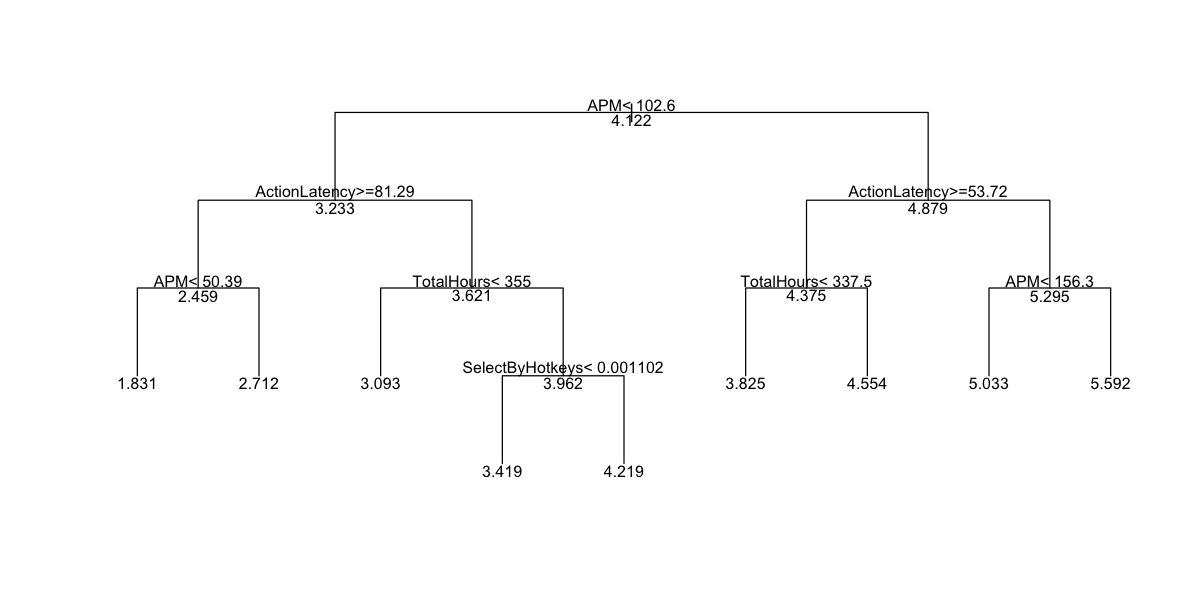

In [8]:
## Arbol gráfico

options(repr.plot.width=10, repr.plot.height=5)

plot(regtree,         # Modelo CART
     uniform = TRUE)  # Grafica uniforme en la division de los nodos

text(regtree,         # Modelo CART
     use.n = FALSE,   # No muestra cantidad de datos en el nodo
     all = TRUE,      # Todos los nodos
     cex = .8)        # Parametro de proporción en el grafico

In [9]:
## Predicción con el modelo

regtree_predictions <- predict(regtree,           # Modelo CART 
                               skillcraft_test)   # Datos para validacion

head(regtree_predictions)

2        8       12       26       33       37 
5.033254 5.591892 3.093168 4.553971 4.553971 2.712329

In [10]:
## Funcion para calcular el error cuadrado medio

compute_SSE <- function(correct, predictions) {
  return(sum((correct - predictions) ^ 2))
}

(regtree_SSE <- compute_SSE(regtree_predictions,            # Predicciones
                            skillcraft_test$LeagueIndex))   # Reales

[1] 740.0874

Se puede observar un $SSE = 740.08$ el cual por si solo no nos da mucha información. Para comparar, se realizará un mejoramiento de los parámetros del árbol.

#### Mejoramiento de parámetros CART

In [11]:
## Modelo con parametros modificados al azar

regtree.random <- rpart(LeagueIndex ~ ., 
                        data = skillcraft_train,                      # Datos de entrenamiento
                        control = rpart.control(minsplit = 20,        # Número mínimo de datos para poder dividir (crear rama)
                                                cp = 0.001,           # Parametro de complejidad
                                                maxdepth = 10))       # Numero maximo de nodos entre las hojas y la raiz

## Predicciones
regtree.random_predictions <- predict(regtree.random,skillcraft_test)

## Suma del error cuadrado
(regtree.random_SSE <- compute_SSE(regtree.random_predictions,skillcraft_test$LeagueIndex))

[1] 747.5498

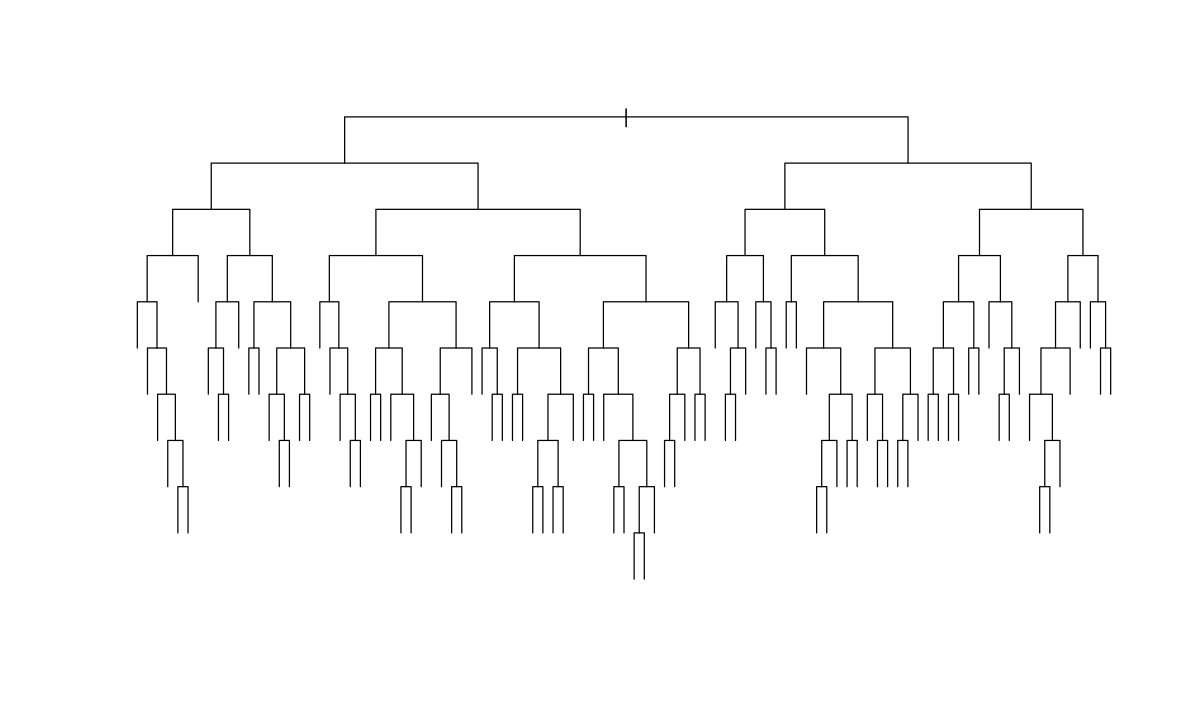

In [12]:
## Estructura del arbol grafico

options(repr.plot.width=10, repr.plot.height=6)

plot(regtree.random, uniform=TRUE)

Note que un árbol con parámetros al azar pueden tener un SSE más alto que el original dado a su alto nivel de poblamiento en las hojas y complejidad, por lo tanto procederemos a la mejora con la librería _e1070_ y sus funciones de _tuning_.

In [13]:
## Se define una lista con el espacio de busqueda de los parametros.
library(e1071)

rpart.ranges <- list(minsplit = seq(5, 50, by = 5), 
                     cp = c(0,0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5), 
                     maxdepth = 1:10)

## Se encuentran los mejores paramtros para el modelo.
(regtree.tune <- tune(rpart,LeagueIndex ~ .,
                      data = skillcraft_train,          # Datos de entrenamiento
                      ranges = rpart.ranges))           # Rangos


Parameter tuning of ‘rpart’:

- sampling method: 10-fold cross validation 

- best parameters:
 minsplit    cp maxdepth
       45 0.002        6

- best performance: 1.041889 


In [14]:
## Modelo CART con los parametros calibrados
regtree.tuned <- rpart(LeagueIndex ~ ., 
                       data = skillcraft_train,                      # Datos de entrenamiento
                       control = rpart.control(minsplit = 35,        # Número mínimo de datos para poder dividir (crear rama)
                                               cp = 0.002,           # Parametro de complejidad
                                               maxdepth = 6))        # Numero maximo de nodos entre las hojas y la raiz

## Predicciones del modelo calibrado
regtree.tuned_predictions <- predict(regtree.tuned,                  # Modelo calibrado
                                     skillcraft_test)                # Datos de test

## Suma del error cuadratico del modelo calibrado.
(regtree.tuned_SSE <- compute_SSE(regtree.tuned_predictions,         # Predicciones
                                  skillcraft_test$LeagueIndex))      # Valores reales

[1] 701.3386

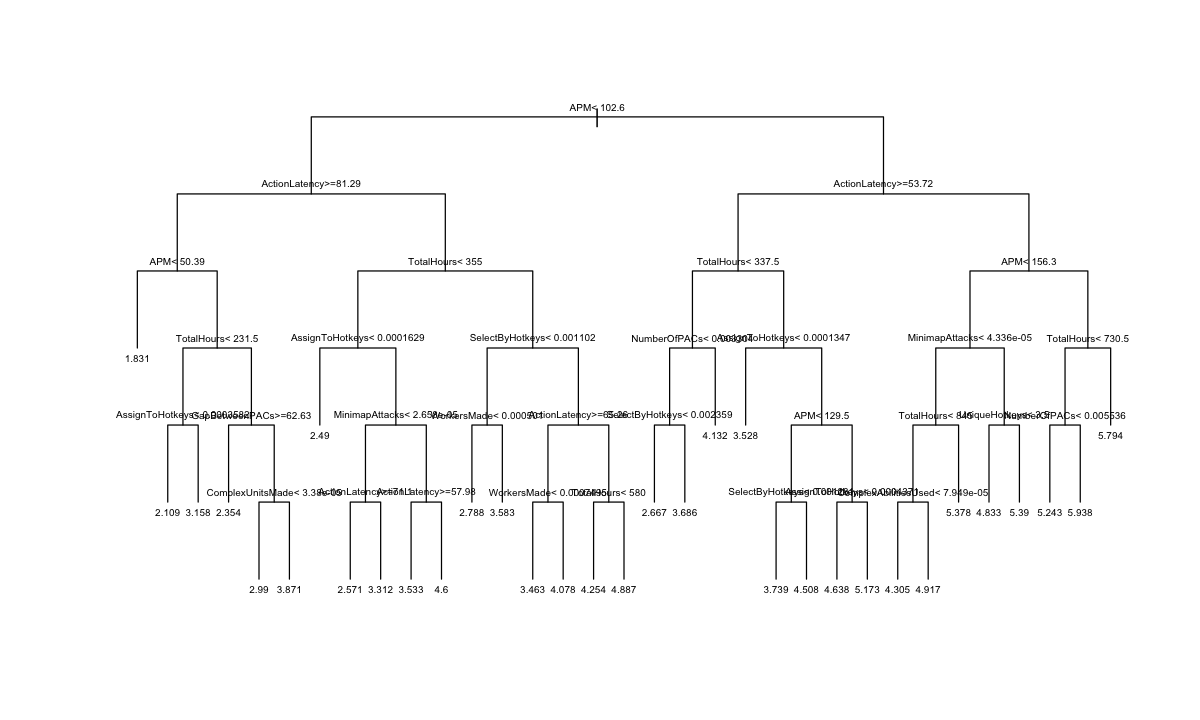

In [15]:
## Arbol grafico del modelo calibrado
options(repr.plot.width=10, repr.plot.height=6)

plot(regtree.tuned, uniform=TRUE)
text(regtree.tuned, cex=0.5)

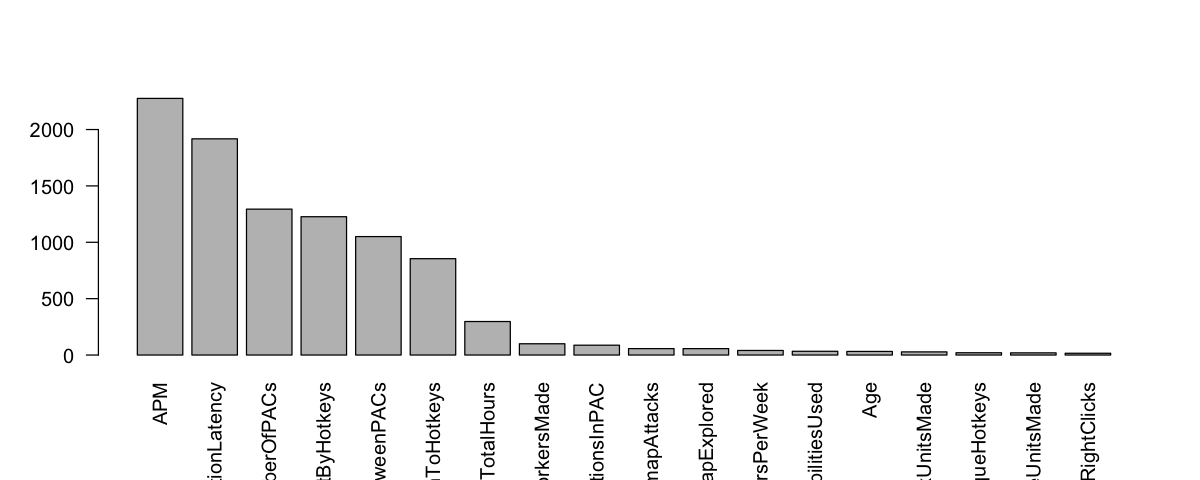

In [16]:
## Grafico de barras

options(repr.plot.width=10, repr.plot.height=4)

barplot(regtree.tuned$variable.importance,           # Datos a graficar
        las=2)                                       # Nombres eje x forma vertical

Se puede observar que la mejora del arbol CART arrojo un **$SSE = 701.33$**, adicional que se puede evidenciar un arbol más compacto que los dos arboles anteriores. Por último, a partir de la importancia de las variables podemos ver que el APM (acciones por minuto) es la variable que más influye a la hora de decidir a qué liga pertence el jugador.

# Algoritmo C5.0
[Contenido](#Contenido)

Este algorimto fue desarrollado por _Ross Quinlan_ el cual es una mejora de los modelos ID3 y C4.5. A diferencia del algoritmo CART, la eleccion del criterio de partición y el procedimiento de poda son los cambios principales.

En primer lugar, el criterio de partición usado se conoce como **_entropía_** o el **_estadístico de información_** que tiene sus raices en la física y la teoría de la información. La primera la define como el grado de caos e incertidumbre en un sístema físico, la segunda la define como la función de distribución de probabilidades el número promedio de digitos binarios necesarios (basado en diferentes simbolos usados) para comunicar información a través de un mensaje.

$$ Entropy = - \sum_{k=1}^{K} p_k · log_2 (p_k) $$

En esta función cuando los componentes de un sistema tienen la misma probabilidad existe un grado más alto de incertidumbre, por otro lado, cuando un componente es más probable que los demas la entropía es más baja. Por lo tanto, aplicado en árboles de decisión, a medida que una clase sea más probable menos entropía (o más puro) será el nodo. 

En siguiente imagen se puede comparar el coeficiente Gini y la entropía para una variable binaria, donde se puede observar que ambas tienen la misma forma curva, no obstante para valores bajos de entropía menor la incertidumbre que tenemos de la clase y mayor pureza. 

<img src="images/entropy.png" width=500>

Por lo tanto, el objetivo es minimizar la entropía del arbol. Para esto se define la **_ganancia de información_** de la siguiente forma:

$$ Information Gain = Entropy_{initial} - \sum_{i=1}^{p} \frac {n_i}{n} · Entropy_i $$

No obstante, esta ganancia se encuentra sesgada ya que favorece más a las variables categoricas que las numéricas, dado que los posibles grupos categoricos de agrupación son mayores comparados con el rango lineal de partición. Para superar esta limitación, se utiliza**_la proporcion de ganancia de información_**, la cual es una versión normalizada respecto al **_valor de información de la partición_**.

$$ Information Gain Ratio = \frac {Information Gain}{Split Information Value} $$

$$ Split Information Value = - \sum_{i=1}^{p} \frac {n_i}{n} · log_2 (\frac {n_i}{n}) $$

Lo anterior representa el incremento potencial en información que se puede obtener solo por el tamaño de las particiones por si solas (Split Information Value). Luego, un valor alto de Split Information Value se da cuando mucha de las observaciones se concentran en un número pequeño de particiones.

Por último, el algoritmo C5.0 incorpora métodos para podar arboles diferentes a los mencionados en CART. Por ejemplo, un nodo intermedio se puede remover antes de un nodo final de tal forma que los nodos debajo de este (sub-arbol) se mueva para arriba y reemplace dicho nodo. De igual forma, incorpora mejoras en velocidad, memoría y mejoramiento, así como el manejo de una matriz de costo para evitar que el algoritmo cometa cierto tipo de clasificaciones erróneas.

# Aplicación algoritmo C5.0 
[Contenido](#Contenido)

**Falsificación Notas Bancarias** 
En este ejemplo se estudiará el problema de predicir si una nota bancaria es genuina o si ha sido falsificada. La imagen de la nota en blanco y negro ha sido escalda usando la transformación ondícula y se han sacado 4 propiedades de estas: La varianza, la asimetría, la curtosis y la entropía, además de la clasificación binaria 1 (falsa) o 0 (geniuna).


> [`caret {caret}`](ftp://cran.r-project.org/pub/R/web/packages/caret/caret.pdf)

> [`C50 {C50}`](https://cran.r-project.org/web/packages/C50/C50.pdf)

In [17]:
## Link de los datos

link<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

## Lectura de datos
bnote<-read.csv(url(link),            # URL abre la conexion con el link
               header=F)              # No tiene encabezado

## Nombres de las variables
colnames(bnote)<-c("waveletVar",      # Varianza
                   "waveletSkew",     # Asimetría
                   "waveletCurt",     # Curtosis
                   "entropy",         # Entropía
                   "class")           # Clasificacion falsa o no

## Forzamos la variable class a categórica (factor)
bnote$class<-as.factor(bnote$class)


head(bnote)                           # Primeros datos

waveletVar,waveletSkew,waveletCurt,entropy,class
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0
4.36840,9.6718,-3.9606,-3.16250,0


In [18]:
## Cargar librería caret
## library(caret)

## Semilla para resultados reproducibles
set.seed(266)

## Crear vector índices de poblaciones de entrenamiento
bnote_sampling_vector <- createDataPartition(bnote$class,    # Crear partición para variable "class"
                                             p =0.80,        # Porcentaje de particion de la data para entrenamiento
                                             list = FALSE)   # Output de la función no sea una lista

## Primeros registros
head(bnote_sampling_vector)                                  # Note que no está el índice 4

Resample1
1
2
3
5
6
7


Se puede observar que en la columna _Resample_ no se encuentran ciertos números. Los numeros que se encuentran en esta variable indica las posiciones de los registros en la base de datos que se utilizarán para entrenar el árbol de decisión. Por el contrario, aquellos números que no se encuentren dentro de esta variable indican las posiciones de los registros en la base de datos que se usarán como validación.

In [19]:
## Subset par datos de entrenamiento
bnote_train <- bnote[bnote_sampling_vector,]  # Datos entrenamiento     

## Subset par datos de validacion
bnote_test <- bnote[-bnote_sampling_vector,]  ## Signo menos trae los registros que no fueron seleccionados en el entrenamiento

In [20]:
## Librería tree
library(C50)

## Creamos arbol C5.0
bnote_tree <- C5.0(class ~ .,             # Variable independiente "class", independientes todas (.)
                   data = bnote_train)    # Data input

## Resumen del modelo
summary(bnote_tree)


Call:
C5.0.formula(formula = class ~ ., data = bnote_train)


C5.0 [Release 2.07 GPL Edition]  	Fri Mar  3 09:19:56 2017
-------------------------------

Class specified by attribute `outcome'

Read 1098 cases (5 attributes) from undefined.data

Decision tree:

waveletVar > 0.75896:
:...waveletCurt > -1.9702: 0 (342)
:   waveletCurt <= -1.9702:
:   :...waveletSkew > 4.9228: 0 (128)
:       waveletSkew <= 4.9228:
:       :...waveletVar <= 3.4776: 1 (34)
:           waveletVar > 3.4776: 0 (2)
waveletVar <= 0.75896:
:...waveletSkew > 5.1401:
    :...waveletVar <= -3.3604: 1 (31)
    :   waveletVar > -3.3604: 0 (93/1)
    waveletSkew <= 5.1401:
    :...waveletVar > 0.30081:
        :...waveletCurt <= 0.35273: 1 (25)
        :   waveletCurt > 0.35273:
        :   :...entropy <= 0.71808: 0 (24)
        :       entropy > 0.71808: 1 (3)
        waveletVar <= 0.30081:
        :...waveletCurt <= 3.0423: 1 (241)
            waveletCurt > 3.0423:
            :...waveletSkew > -1.8624: 0 (21/1)
  

Se observa el árbol de forma lógica con cada uno de sus nodos, sus respectivas reglas y valores de corte. Para los nodos hoja, se observan el número de  observaciones que hay en cada uno con su respectivo valor 0 o 1. No obstante, esta vista puede ser confusa y poco entendible, por lo tanto se grafica el arbol.

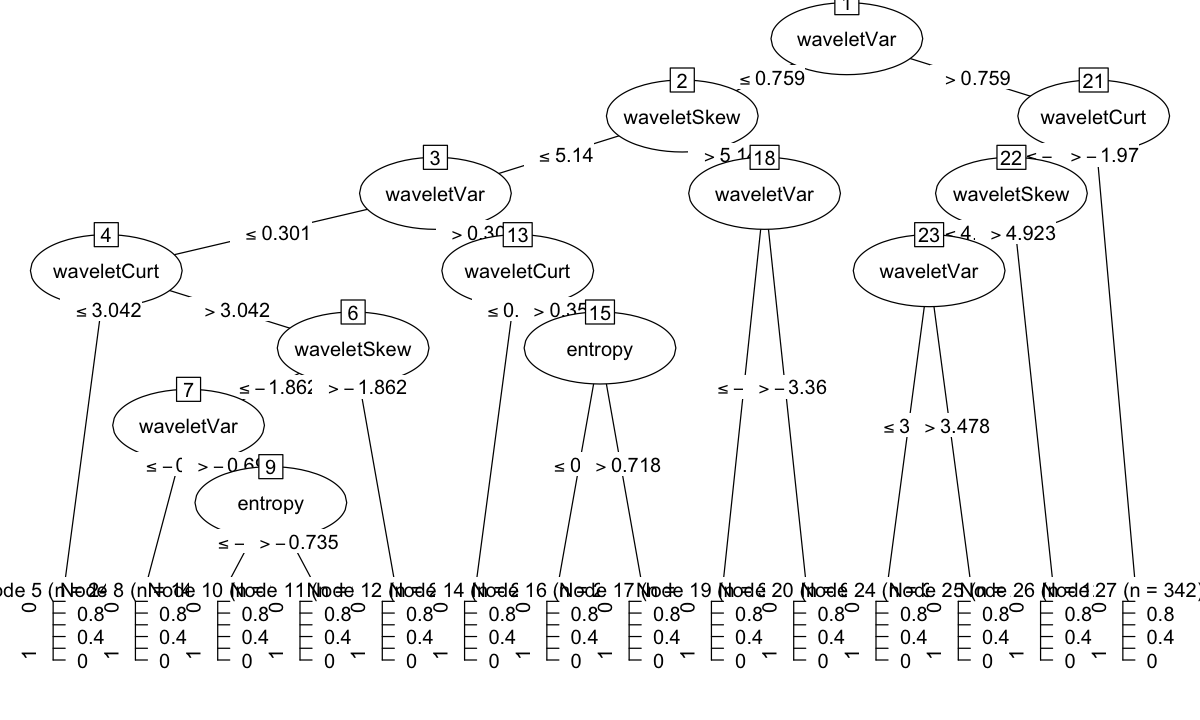

In [21]:
## Arbol gráfico

options(repr.plot.width=10, repr.plot.height=6)
plot(bnote_tree)

In [22]:
## Predicciones
bnote_predictions <- predict(bnote_tree,  # Modelo de arbol de decision 
                             bnote_test)  # Data de validacion

head(bnote_predictions)                   # Primero registros 

[1] 0 0 0 0 0 0
Levels: 0 1

In [23]:
## Evaluar las predicciones que coinciden con el valor real (Precision) 

mean(bnote_test$class == bnote_predictions)

[1] 0.9890511

Se observa que para los datos de validación, se acierta en la clasificación de la nota bancaria en el 98.90% de las veces.

---

**Ejercicio.--**. Utilice la base de datos de [Iris](https://www.kaggle.com/uciml/iris/downloads/iris-species.zip) la cual contiene las siguientes características de 3 especies de flores:

- Identificador de la flor
- Longitud del sépalo
- Ancho del sépalo
- Longitud del pétalo
- Ancho del pétalo
- Tipo de especie

Para este ejericio, se busca identificar a partir de las longitudes y largos del sépalo y pétalo, el tipo de especie al que la flor pertenece. Para esto utilice un 90% de los datos para entrenamiento y el restante para evaluación. Adicionalmente se requiere que realice dos modelos con los algoritmos C5.0 y CART, compare sus desempeños y diga cuál es el mejor. En caso de ser posible, utilice mejoramiento de parámetros para ambos modelos.

---

**Ejercicio.--**.Se tiene la información de personas aseguradas en un plan médico donde indica las características de los pacientes así como los gastos médicos asociados a cada asegurado. 

Las variables contenidas en este conjunto de datos son: 
- Edad
- Sexo
- Indice de masa corporal (IMC)
- Número de hijos cubiertos por el plan de seguros
- Si el asegurado es fumador o no
- Región geográfica
- Gastos médicos para el asegurado

Dado que para una aseguradora no le sale rentable tener unos gastos muy elevados, un modelo de predicción de gastos agregaría valor a la administración de riesgos dado que permite estimar posibles perdidas incurridas para establecer provisiones o realizar campañas de prevención a las características de mayor importancia. Se busca desarrollar una solución a las siguientes preguntas de negocio que se enfrentan: 

- Si una persona es asegurada, ¿cuál es el gasto médico en el que pueda incurrir?
- ¿Qué características de la persona influyen más en el nivel de gastos médicos.
- ¿Qué tan confiable son las predicciones que realiza el modelo?

Tenga en cuenta que algunas veces la relación entre las variables presenta relaciones no lineales, por ejemplo, la edad entre más alta sea más implicaciones en el costo médico tendrá (no necesariamente es una relación lineal). El IMC por ejemplo comenzará a ser crítico en los costos médicos si este sobrepasa el promedio. Por tanto, definir estas relaciones no lineales será de gran importancia para que el modelo analizado pueda ajustarse de manera más precisa. Por lo tanto utilice las siguientes transformaciones a las variables: 
1. Reemplazar la variable de edad, por el cuadrado de esta. 
2. Utilizar un indicador binario para identificar que el IMC está por encima del promedio.

---

[Contenido](#Contenido)
